In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [2]:
# Load the dataset
data = pd.read_csv('/content/sonar data.csv')  # Assuming 'sonar.csv' is your dataset file



# Visualizations
# 1. Distribution of the target variable


# 2. Correlation Heatmap

# Splitting features and target

# Data Preprocessing


# Model Training and Comparison
# Logistic Regression


# Decision Tree


# Random Forest

# Hyperparameter Tuning for Random Forest

# Evaluation with Confusion Matrix






In [3]:
# Initial Data Exploration
print("First few rows of the dataset:")
print(data.head())

print("\nData Summary:")
print(data.describe())

print("\nData Types:")
print(data.info())

First few rows of the dataset:
   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.00

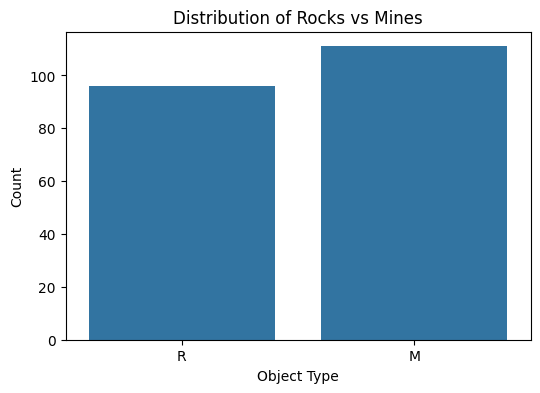

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data.iloc[:, -1])
plt.title('Distribution of Rocks vs Mines')
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.show()

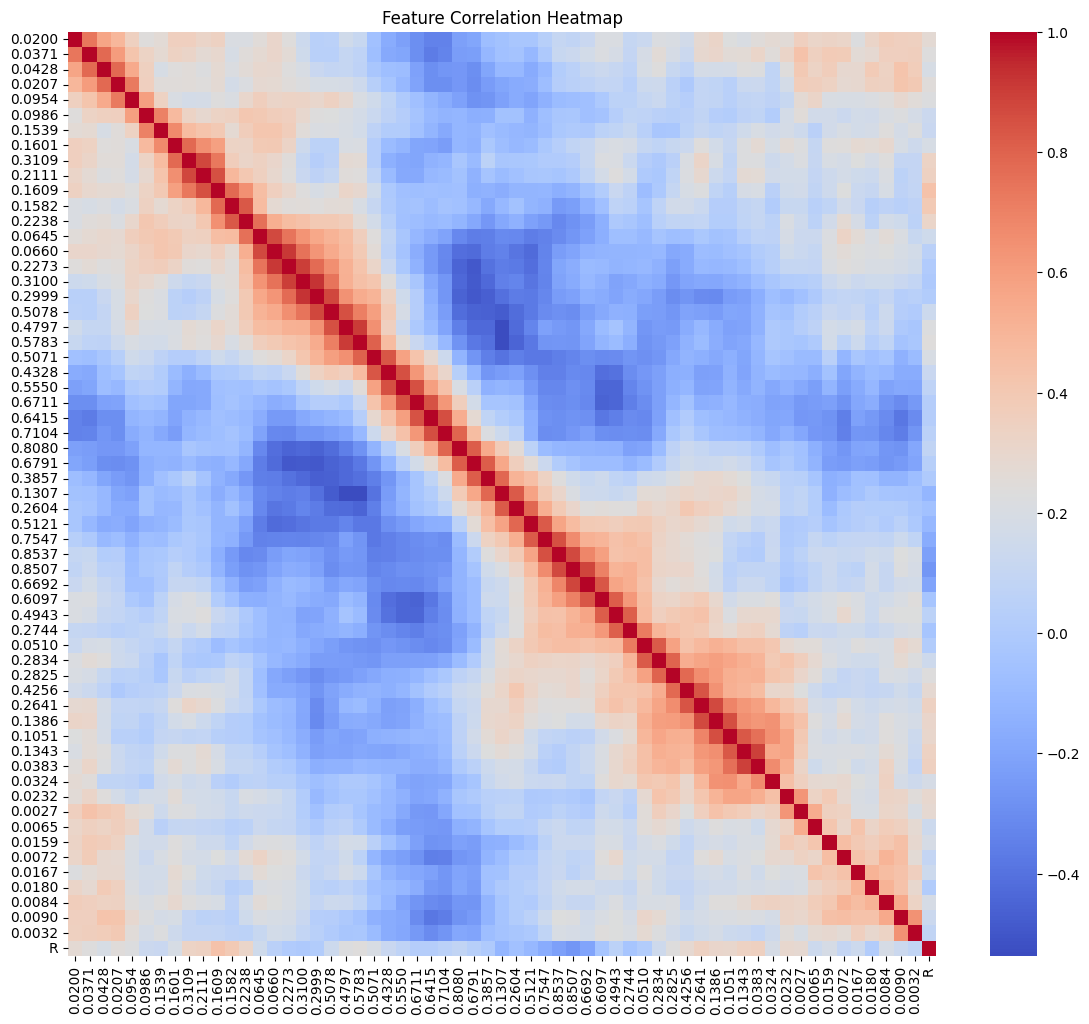

In [6]:
# Separate features and target
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

# Encode target variable ('R' as 0 and 'M' as 1) for correlation heatmap
data_encoded = data.copy()
data_encoded.iloc[:, -1] = data_encoded.iloc[:, -1].map({'R': 0, 'M': 1})

# Correlation Heatmap for Features Only
plt.figure(figsize=(14, 12))
sns.heatmap(data_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()



In [7]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_train_accuracy = accuracy_score(Y_train, log_model.predict(X_train))
log_test_accuracy = accuracy_score(Y_test, log_model.predict(X_test))
print(f"Logistic Regression Training Accuracy: {log_train_accuracy:.2f}")
print(f"Logistic Regression Testing Accuracy: {log_test_accuracy:.2f}")

Logistic Regression Training Accuracy: 0.95
Logistic Regression Testing Accuracy: 0.79


In [10]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)
tree_train_accuracy = accuracy_score(Y_train, tree_model.predict(X_train))
tree_test_accuracy = accuracy_score(Y_test, tree_model.predict(X_test))
print(f"Decision Tree Training Accuracy: {tree_train_accuracy:.2f}")
print(f"Decision Tree Testing Accuracy: {tree_test_accuracy:.2f}")

Decision Tree Training Accuracy: 1.00
Decision Tree Testing Accuracy: 0.55


In [11]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, Y_train)
forest_train_accuracy = accuracy_score(Y_train, forest_model.predict(X_train))
forest_test_accuracy = accuracy_score(Y_test, forest_model.predict(X_test))
print(f"Random Forest Training Accuracy: {forest_train_accuracy:.2f}")
print(f"Random Forest Testing Accuracy: {forest_test_accuracy:.2f}")


Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.83


Optimized Random Forest Testing Accuracy: 0.83


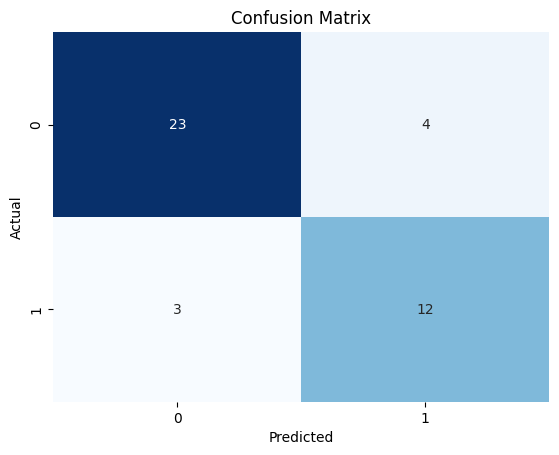

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, Y_train)
best_test_accuracy = accuracy_score(Y_test, best_model.predict(X_test))
print(f"Optimized Random Forest Testing Accuracy: {best_test_accuracy:.2f}")

best_predictions = best_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, best_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [13]:
# Classification Report
print("Classification Report for Optimized Random Forest Model:")
print(classification_report(Y_test, best_predictions))

Classification Report for Optimized Random Forest Model:
              precision    recall  f1-score   support

           M       0.88      0.85      0.87        27
           R       0.75      0.80      0.77        15

    accuracy                           0.83        42
   macro avg       0.82      0.83      0.82        42
weighted avg       0.84      0.83      0.83        42



In [14]:
# Prediction for a New Input
input_data = (0.0286, 0.0453, 0.0277, 0.0174, 0.0384, 0.0990, 0.1201, 0.1833, 0.2105, 0.3039, 0.2988, 0.4250, 0.6343, 0.8198, 1.0000, 0.9988, 0.9508, 0.9025, 0.7234, 0.5122, 0.2074, 0.3985, 0.5890, 0.2872, 0.2043, 0.5782, 0.5389, 0.3750, 0.3411, 0.5067, 0.5580, 0.4778, 0.3299, 0.2198, 0.1407, 0.2856, 0.3807, 0.4158, 0.4054, 0.3296, 0.2707, 0.2650, 0.0723, 0.1238, 0.1192, 0.1089, 0.0623, 0.0494, 0.0264, 0.0081, 0.0104, 0.0045, 0.0014, 0.0038, 0.0013, 0.0089, 0.0057, 0.0027, 0.0051, 0.0062)
input_data_np = np.asarray(input_data).reshape(1, -1)
input_data_scaled = scaler.transform(input_data_np)
prediction = best_model.predict(input_data_scaled)
print(f"The object is a {'Rock' if prediction[0] == 'R' else 'Mine'}")

The object is a Rock


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
